In this file I seek to extend the amount of context available to GPT-3.5 for making its decisions.
1. Fetch biographies from instagram OR add other posts from same user OR same hashtags
2. Add them to the prompt
3. Rerun the prompt
4. Run only on 500 samples or one dataset

In [1]:
import pandas as pd
import pickle as pkl
import openai
from sklearn.metrics import confusion_matrix, classification_report
import time
import json
from data.GPTclassifier import gptclassifier

# import large file
df = pd.read_pickle("data/annotated_test_explantions_gpt3.pkl")
openai.api_key = ""

#### Scraping: Need to use tool like selenium to render JS code. Beatiful soup didn't suffice

In [19]:
import requests
from bs4 import BeautifulSoup

def get_bio(user):
    # URL of the page we want to scrape
    url = f'http://example.com/{user}'
    
    # Send a HTTP request to the URL of the webpage you want to access
    response = requests.get(url)

    # If the HTTP request returns a status code of 200 then it means that the page was successfully accessed
    if response.status_code == 200:
        # Get the content of the response
        page_content = response.content

        # Create a BeautifulSoup object and specify the parser
        soup = BeautifulSoup(page_content, 'html.parser')
        
        # Find the tag with the class 'bio' and get its text
        bio = soup.find(class_='bio').get_text()

        return bio
    else:
        return None

# List of users
users = ['zeitimbild', 'ryanair']

# Create a dictionary to hold users and their bios
user_bios = {}

# Loop through each user
for user in users:
    bio = get_bio(user)
    
    # If the bio was successfully scraped, add it to the dictionary
    if bio is not None:
        user_bios[user] = bio

print(user_bios)

{}


In [31]:
user = ""
url = f'https://www.instagram.com/ryanair/'
    
# Send a HTTP request to the URL of the webpage you want to access
response = requests.get(url)

page_content = response.content
soup = BeautifulSoup(page_content, 'html.parser')
    
# Find the tag with the class 'bio' and get its text
bio = soup.find('h1', class_='_aacl _aaco _aacu _aacx _aad6 _aade')#.get_text()
bio

b'<!DOCTYPE html><html class="_9dls" lang="en" dir="ltr"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" rel="icon" sizes="192x192" href="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" /><meta name="robots" content="noarchive, noimageindex" /><meta charset="utf-8" /><meta name="apple-mobile-web-app-status-bar-style" content="default" /><meta name="mobile-web-app-capable" content="yes" /><meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" /><meta name="theme-color" content="#ffffff" /><link rel="apple-touch-icon" sizes="76x76" href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" /><link rel="apple-touch-icon" sizes="120x120" href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" /><link rel="apple-touch-icon" sizes="152x152" href="https://static.cdninstagram.com/rsrc.php/v3/yx/r/H1l_HHqi4p6.png" /><lin
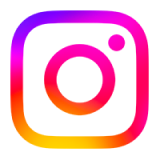
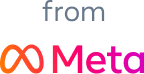

In [36]:
page_content

In [15]:
url = f'http://www.instagram.com/{user}'

# Send a HTTP request to the URL of the webpage you want to access
response = requests.get(url)

#### Prompt

In [37]:
# Less biasing towards the positive label
# More precise defintion
# Keep 4 labels
# Better Examples

# I'll try as it is just with more context
# asap I'll expand with a completely new prompt


# Note: I removed "the slightest indication of potential sponsoring is sufficient to return 'Potentially sponsored'"

In [67]:
messages = [{"role": "system", "content": "You are an assistant helping an academic to reason about whether a post contains (potentially non-commerical) promotional activity or even is potentially sponsored. I will provide you with the caption of an instagram post as well as maybe the caption of other posts from the same user, so you have more context. You give me a short and concise reasoning why or why not the main post might be an ad, i.e. the result of a financial contract. For later classification there are four labels available, 'Potentially sponsored', 'Self advertisement', 'Ambiguous' and 'Likely not sponsored'. The label should only reflect the main post, not the posts I give you as context. Be concise in your reasoning and always strictly adhere to the pattern from the examples, i.e. always decide for one and only one label and finish your response with it. If you are uncertain, err strongly towards 'Potentially sponsored'. Also strongly prefer 'Self advertisement' over 'Ambigous'. Always keep responses short and concise."},
{"role": "user", "content": "Main Post: ''I DO NOT OWN THE RIGHTS TO THIS SONG. Upload attempt #2.... I COULD NOT STOP playing this song over Christmas break for some odd reason. It’s my favorite joint off of @badgalriri ‘s #anti album. Listening repeatedly made wonder what it would sound like with drums... 🤔😏 #thepocketqueen 👸🏾♥️🤦🏾\u200d♀️ #practicemakespocket #jamesjoint #groovewithme #drummerbae\n\nHair: @hairbylucylomuro_ \nThreads: @truequeenbrand'. Author: @thepocketqueen \n Context Post 1: @erinelijah this is amazing. \nI appreciate it so much ♥️♠️ \n#thepocketqueen #pocketqlub♦️♣️ #fanart. \n Context Post 2: 2 days ago ♠️𝗣𝗼𝗰𝗸𝗲𝘁 𝗤𝘂𝗲𝗲𝗻 & 𝗧𝗵𝗲 𝗥𝗼𝘆𝗮𝗹 𝗙𝗹𝘂𝘀𝗵 ♥️ made its debut performance after placing as a runner up in @nprmusic ‘s #TinyDeskContest  \nIt’s one thing to do cool stuff. It’s a whole other blessing to be able to do it with your friends. :) BIG thanks to @ryckjane and @iammattrose for coming through and hopping on the mic. \n📸: @farahstop."},
{"role": "assistant", "content": "Key indicators: 'of @badgalriri ‘s #anti album', 'Threads: @truequeenbrand', 'Hair: @hairbylucylomuro'.\nReasoning: The post clearly promotes a song, another artist @badgalriri. Additionally there are several businesses featured in the. Each of those four aspects by itself is some indication of sponsoring, so all together clearly potentially sponsored. Label: Potentially sponsored."},
{"role": "user", "content": "Post: 'I love cheeseburgers so much!😱 @barneysburgershop'. Author: @stevietheking. \n Context Post 1: [...] \n Context Post 2: [...]"},
{"role": "assistant", "content": "Key indicators: '@barneysburgershop'.\nReasoning: The post clearly promotes a restaurant called barneysburgershop. However it is also extremely common that people feature restaurants because they genuinely enjoy their food or want to show off with it. Lacking further evidence, it rather Ambigous than a paid partnership. Label: Ambiguous."},
{"role": "user", "content": "Post: 'She drives me INSANE every other hour, but i don’t know what i would do without her crazy ass! #sisters'. User: @thestilettomeup \n Context Post 1: [...] \n Context Post 2: [...]"},
{"role": "assistant", "content": "Key indicators: '#sisters'.\nReasoning: Clearly a personal post about the author's sister. Label: Likely not sponsored."},
{"role": "user", "content": "Post: 'weworewhat swim spring collection home designs and prints inspired by elements from my home and favorite interior design what you can expect this silhouette print inspired by the many female body sculptures that can be found in my apartment marbles cowhide florals and more @shopweworewhat'. Author: weworewhat \n Context Post 1: [...] \n Context Post 2: [...]"},
{"role": "assistant", "content": "Key indicators: 'weworewhat', '@shopweworewhat'.\nReasoning: This post clearly advertises swim suits. However the shop @shopweworewhat is clearly a shop of the author weworewhat herself, so its very unlikely a paid partnership but clearly self advertisement. Label: Self advertisement."},
{"role": "user", "content": "Post: 'A night in San Francisco 💋 I am so excited to meet all of the @createcultivate attendees and share more of my story... #moreofwhatmatters \nTop: @storets \nPants : @jacquemus \nShoes: @gianvitorossi \nStyled By: @monicarosestyle'. Author: iamcattsadler. \n Context Post 1: She’s becoming such a young lady and it’s all happening so fast! \nMy sweet heart! 💚 \nMatching outfits from @byegreis + @ivygreis. \n Context Post 2: Legs or shoes? Take your pick! 😜 \nNew booties @aminamuaddiofficial \nI love me a good platform!"},
{"role": "assistant", "content": "Key indicators: 'Top: @storets', 'Pants : @jacquemus', 'Shoes: @gianvitorossi', 'Styled By: @monicarosestyle'.\nReasoning: This post promotes various fashion brands and stylers. There is no evidence suggesting it is not paid. Label: Potentially sponsored."}]

# Note: gpt-3.5 by default tends to avoid the label 'sponsored'. That's why the prompt emphasises a strong emphasis in favor of it. I suspect this is due to this truthfulness fine-tuning, making it afraid to unjustly judge someone's post

#### ...

In [78]:
# execute classification
completions_classic = []
results = gptclassifier(df.reset_index(drop=True).iloc[:80],messages,completions_classic)

starting
Counter at 1
Waiting for 65s InvalidRequestError
This model's maximum context length is 4097 tokens. However, your messages resulted in 4231 tokens. Please reduce the length of the messages.


KeyboardInterrupt: 

In [70]:
# execute classification
completions = []
results = gptclassifier(df.reset_index(drop=True),messages,completions)

Counter at 1
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/poeticfootsoldier/UM-final-semester/thesis/enforcing-the-digital-services-act/thesis-venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_9927/431653244.py", line 3, in <module>
    results = gptclassifier(df.reset_index(drop=True),messages,completions)
  File "/home/poeticfootsoldier/UM-final-semester/thesis/enforcing-the-digital-services-act/11-adding-context/data/GPTclassifier.py", line 17, in gptclassifier
  File "/home/poeticfootsoldier/UM-final-semester/thesis/enforcing-the-digital-services-act/thesis-venv/lib/python3.9/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
  File "/home/poeticfootsoldier/UM-final-semester/thesis/enforcing-the-digital-services-act/thesis-venv/lib/python3.9/site-packages/openai/api_resources/abstract/engine_api_resource.py",

In [66]:
pd.DataFrame(completions).to_pickle("safety.pkl")

In [ ]:
# run this twice over 100 posts to see whether it makes any difference.

In [ ]:
completions_as_boolean_2 = [True if ((response.endswith("rue"))
                                   or (response.endswith("rue."))
                                   or (response.endswith("True/Uncertain.")))
                          else False if ((response.endswith("alse"))
                                         or (response.endswith("alse."))
                                         or (response.endswith("False/Uncertain.")))
                          else response for response in results[0]]
four_labels_2 = ["True." if response.endswith("otentially sponsored.")
                          else "Self advertisement." if response.endswith("sement.")
                          else "False." if response.endswith("not sponsored.")
                          else "Ambiguous." if response.endswith("Ambiguous.")
                          else response for response in results[0]]